# Introduction


- This file contains the all the computations one can do with pbox, from construction to propagation
- It is demonstrated from the APIs of the UN package

In [1]:
from PyUncertainNumber.UC.uncertainNumber import UncertainNumber as UN
from PyUncertainNumber import pba
import numpy as np

In [2]:
from PyUncertainNumber.pba.pbox_nonparam import KS_bounds, d_alpha
from PyUncertainNumber.pba.params import Params, Data
from intervals import Interval, intervalise

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

# Construct probability boxes

There are several situations where you could construct a pbox given various levels of information regarding the distribution properties, given the nature of the pbox (parametric or nonparametric)

## construct parametric pboxes

In [ ]:
mu_i, sigma_i = pba.I([0,1]), pba.I([1,2])

In [ ]:
''' a short-cut for parametric pbox specification '''
# note: any iterable will work

pba.normal([0,1], [1,2]).display()
# pba.normal((0,1), (1,2)).display()
# pba.normal((0,1), [1,2]).display()

# or you can use an Interval object
# pba.normal(mu_i, sigma_i)

In [ ]:
foo = UN(essence='distribution', 
         distribution_parameters=['uniform', [(0,1),(1,2)]])

foo.display()

In [ ]:
verbo_pbox = UN(
    name='Elas_modulus', 
    symbol='E', 
    units='GPa', 
    essence='distribution', 
    distribution_parameters=['gaussian', [(0,1),(1,2)]]
)

In [ ]:
verbo_pbox.display(style='band')

### implementation of parametric pbox constructions

> see [pbox_signature.ipynb](.pbox_signature.ipynb) for additional details.

1. shortcut via `pba.norm(args)` where args could be either Interval, list, or nInterval objects;
2. UN(essence='pbox', ...). Essentially I'd like this to call e.g. pba.norm()

In [ ]:
_ = pba.norm([0,1], [2,3]).display()

In [ ]:
# ''' test what left and right are '''

# un_left == Left
# fig, ax = plt.subplots()
# ax.plot(Left, Params.p_values)
# ax.plot(Right, Params.p_values)

# l, r = zip(*[(min(i), max(i)) for i in zip(Left, Right)])
# l == Left
# r == Right

## construct nonparametric free pbox

- let's test on existing nonparametric constructers


### partial information

In [ ]:
pba.I(1,2)

In [ ]:
from_percentiles(
    {0: 0,
    0.25: 0.5,
    0.5: pba.I(1,2),
    0.75: pba.I(1.5,2.5),
    1: 3}
).show()

In [ ]:
box(1,2).show()

In [ ]:
mean_var(0,1).show()

In [ ]:
min_mean(0,1).show()

In [ ]:
min_max_mean(0,2,1).show()

In [ ]:
min_max_mean_var(0, 2, 1, 0.5).show()

### KS bounds for precise data

In [ ]:
# ''' compute dn '''
# # n = len(Params.s)
# # dn = d_alpha(30, alpha=0.025)
# # dn

In [ ]:
_, _= KS_bounds(Data.s, alpha=0.025,  display=True)

### KS bounds for imprecise data

In [4]:
v_skinny = intervalise(Data.skinny)

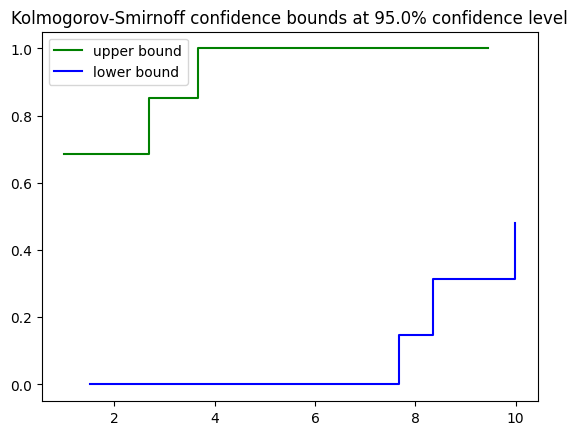

In [5]:
_, _ = KS_bounds(v_skinny, alpha=0.025,  display=True)

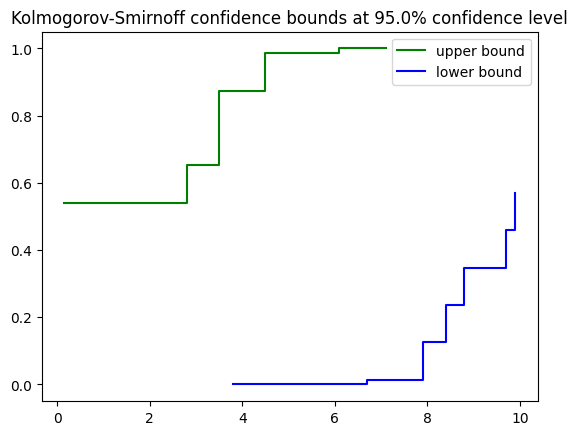

In [6]:
v_puffy = intervalise(Data.puffy)
_, _ = KS_bounds(v_puffy, alpha=0.025,  display=True)

# propagation of pbox

- slice method
- interval Monte Carlo
- surrogate